## Exploring and Understanding the Star Type Data
- CSV data link:- https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-

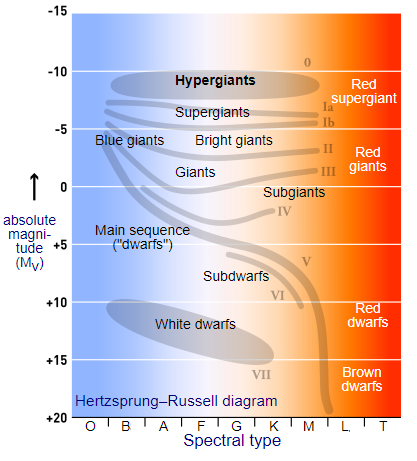

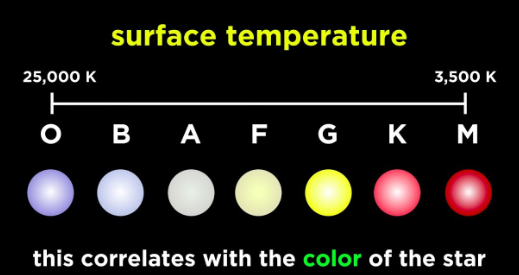

In [160]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

In [161]:
star_df = pd.read_csv('cleaned_star_data.csv')
star_df.sample(10) # Random 10 samples from star_df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
38,5936,1.35700,1.1060,4.460,3,Yellow-White,F
178,12100,120000.00000,708.9000,-7.840,5,Blue-White,B
58,3752,209000.00000,955.0000,-11.240,5,Red,M
120,3323,0.00043,0.0912,17.160,0,Red,M
115,3553,145000.00000,1324.0000,-11.030,5,Red,M
41,3365,340000.00000,23.0000,-6.200,4,Red,M
51,3750,283000.00000,1260.0000,-7.630,5,Red,M
199,3463,0.00270,0.6750,14.776,1,Red,M
27,7700,0.00011,0.0128,14.470,2,Yellow-White,F
137,3598,0.00110,0.5600,14.260,1,Red,M


In [162]:
# Check general information about the dataframe
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants      

In [163]:
# Mapping of Star type to labels
star_type_to_label = {
    0: 'Brown Dwarf',
    1: 'Red Dwarf',
    2: 'White Dwarf',
    3: 'Main Sequence',
    4: 'Supergiants',
    5: 'Hypergiants'
}

# Adding the new column 'Star type label' based on the mapping
star_df['Star type label'] = star_df['Star type'].map(star_type_to_label)

### Create a directory to save different Visualizations

In [164]:
# Create a directory to save the visualizations
folder_name = 'star_plots'                     # directory name
os.makedirs(folder_name, exist_ok=True)        # Create directory if not exisiting
base_dir = f'{folder_name}/'          # Store the path of this directory as base_dir to use it further

In [165]:
# # Bar chart to visualize the count of stars with respective type with Matplotlib
# plt.figure(figsize=(6,6))
# plt.style.use('dark_background')
# ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'yellow', 'lightblue', 'orange'])
# ax.bar_label(ax.containers[0], color='red', weight='bold')
# plt.title('Visualize star count per star type', color='royalblue', weight='bold')
# plt.yticks(color='tab:pink')
# plt.ylabel('# of Stars', color='white', fontsize=13)
# plt.xticks(ticks=[0, 1, 2, 3, 4, 5],
#            labels=['Brown\nDwarf', 'Red\nDwarf', 'White\nDwarf', 'Main\nSequence', 'Supergiants', 'Hypergiants'],
#            rotation=45, color='lime')
# plt.savefig(base_dir+'barplot_star_count.png')
# plt.show()

In [166]:
# # Visulaising the Star color data using Matplotlib + Seaborn
# ax = sns.barplot(x=star_df['Star color'].value_counts().index,
#             y=star_df['Star color'].value_counts(),
#             palette='viridis')

# # ax.bar_label(ax.containers, color='red', weight='bold')

# # Explicitly label each bar
# for container in ax.containers:
#     ax.bar_label(container, color='red', weight='bold')

# plt.title('Visualizing the count of Star Colors', color='royalblue', fontsize=15, weight='bold')
# plt.xticks(rotation=15, color='orange', fontsize=11)
# plt.xlabel('Star color',color='white', fontsize=13)
# plt.ylabel('Count',color='white', fontsize=13)
# plt.yticks(color='tab:pink')
# plt.savefig(base_dir+'star_colors_viz.png')
# plt.show()

In [167]:
star_type_counts = star_df['Star type label'].value_counts().reset_index()
star_type_counts

,index,Star type label
0,Brown Dwarf,40
1,Red Dwarf,40
2,White Dwarf,40
3,Main Sequence,40
4,Supergiants,40
5,Hypergiants,40


In [168]:
# Count values by star type
star_type_counts = star_df['Star type label'].value_counts().reset_index()

star_type_counts['percentage'] = (star_type_counts['Star type label'] / star_type_counts['Star type label'].sum()) * 100

# Create bar chart using Plotly
fig = px.bar(star_type_counts, x='index', y='Star type label', labels={'index' : 'Star type', 'Star type label' : 'Star type count'}, text='Star type label',
             color='index', title='Visualize star count per star type')
# fig.update_xaxes(ticktext=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants'],
#                  tickvals=[0, 1, 2, 3, 4, 5])
# fig.update_layout(showlegend=False)
fig.update_traces(hovertemplate='Star Type: %{x}<br>Count: %{y}<br>Percentage: %{customdata:.2f}%', customdata=star_type_counts['percentage'])

# Identifying the most and least common star types
most_common = star_type_counts.loc[star_type_counts['Star type label'].idxmax()]
least_common = star_type_counts.loc[star_type_counts['Star type label'].idxmin()]

# Adding annotations
# fig.add_annotation(x=most_common['index'], y=most_common['Star type label'],
#                    text="Most common",
#                    showarrow=True, arrowhead=1, ax=20, ay=-30)

# fig.add_annotation(x=least_common['index'], y=least_common['Star type label'],
#                    text="Least common",
#                    showarrow=True, arrowhead=1, ax=-20, ay=30)

fig.update_layout(height=600, width=800)

fig.show()
fig.write_image(base_dir+'barplot_star_count.png')

In [169]:
# Calculating value counts for 'Star color'
star_color_counts = star_df['Star color'].value_counts().reset_index()
star_color_counts.columns = ['Star color', 'Count']

# Creating the bar plot
fig = px.bar(star_color_counts, x='Star color', y='Count', 
             title='Visualizing the count of Star Colors',
             text='Count', # This adds labels to the bars
             color='Star color', # This changes the color of the bars based on the 'Star color' column
             color_discrete_map= {'Red': 'OrangeRed', 'Blue' : 'blue', 'Blue-White': 'lightblue', 'White': 'azure', 'Yellow-White': 'yellow'})

fig.update_layout(height=600, width=800)
fig.show()

# To save the figure
fig.write_image(base_dir+'star_colors_viz.png')

### Visualize outliers
- ```plt.subplot(rows, cols, position)``` here position indicates out of all the rows & columns, which position to plot in.
- For example, ```plt.subplot(2, 3, 2)``` means that create a plot on the second postion of 6 available positions.

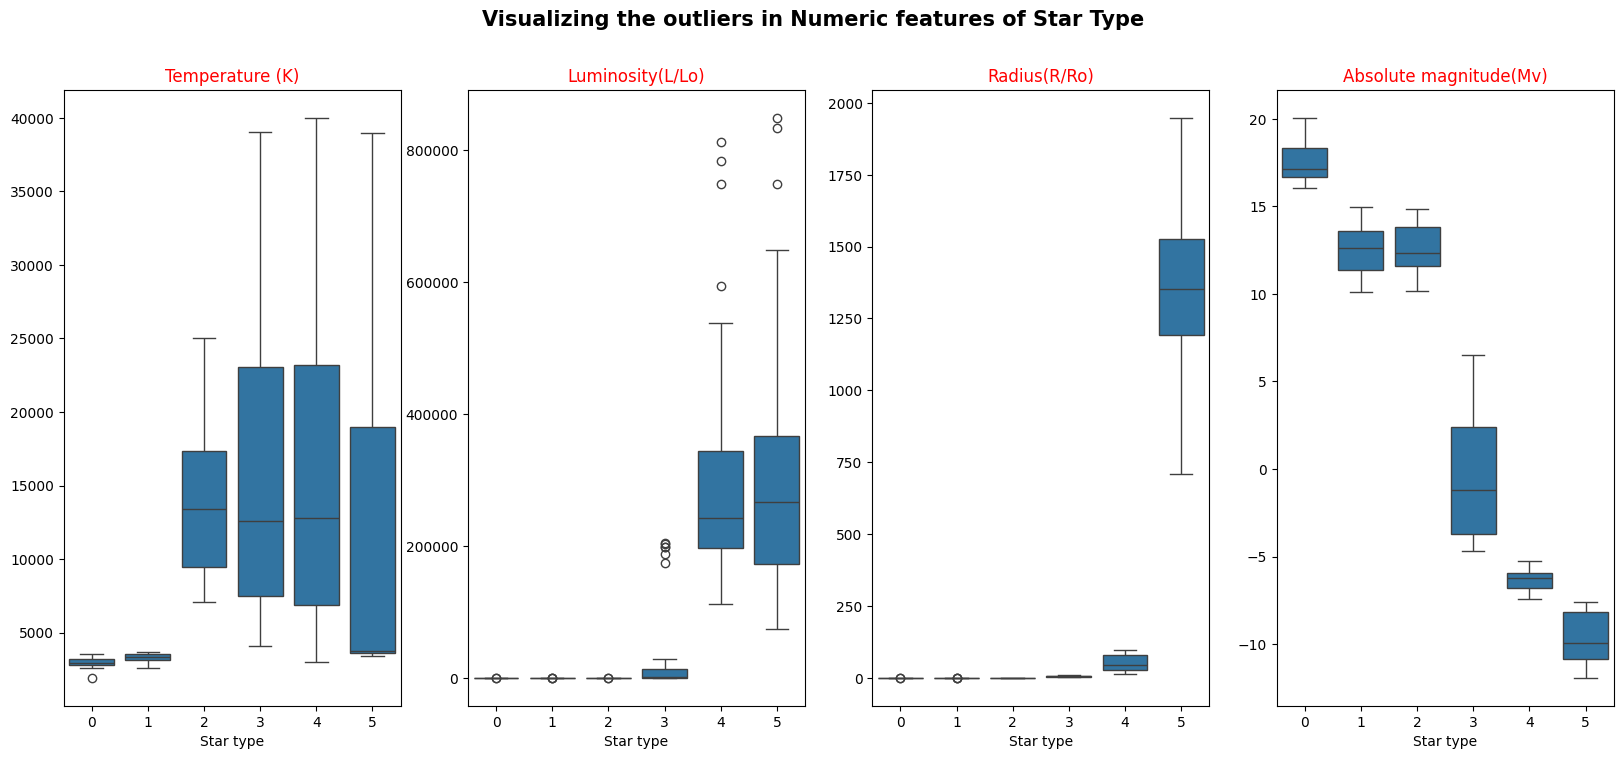

In [170]:
# Visualize Outliers in the Data
plt.figure(figsize=(20,8))
plt.style.use('default')
plt.suptitle('Visualizing the outliers in Numeric features of Star Type',
             color='black', weight='bold', fontsize=15)

# Using for loop to easily repeat some steps to create subplot
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, i])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

# Saving the figure
plt.savefig(base_dir+'boxplot_star_type.png')

In [171]:
# Assuming star_df is your DataFrame and base_dir is defined
# Set up the subplot framework
fig = make_subplots(rows=1, cols=4, subplot_titles=star_df.columns[:4])

# Loop over the numeric features to create a box plot for each, grouped by 'Star type'
for i, column in enumerate(star_df.columns[:4], start=1):
    fig.add_trace(
        go.Box(x=star_df['Star type label'], y=star_df[column], name=column),
        row=1, col=i
    )

# Update layout to adjust the appearance
fig.update_layout(
    title_text="Visualizing the outliers in Numeric features of Star Type",
    showlegend=False,
    width=1800,  # Approximate size to match your Matplotlib figure
    height=900,
    
)

fig.show()

fig.write_image(base_dir + 'boxplot_star_type_plotly.png')  # Requires Orca and psutil

# Alternatively, you can save it as an HTML file which can be opened in a browser and manually saved as PNG.
fig.write_html(base_dir + 'boxplot_star_type_plotly.html')

- With respect to star type we can see the statistical distribution of the numerical features.

### Create lineplots
- Show how the values are distributed for each of the numeric features.
- Again create a subplot but now with 4 rows and 1 col.

In [172]:
def line_subplot(star_df, colors, i):
  """
  This will create subplot within for loop

  Parameters
  ----------
  - star_df: data frame
  - colors: colors to display on plot
  - i: index of the iteration

  Generates
  ------
  - subplot on all axes with respective plots and titles
  """
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:,i], color=colors[i])
  plt.title(star_df.columns[i], color='red')

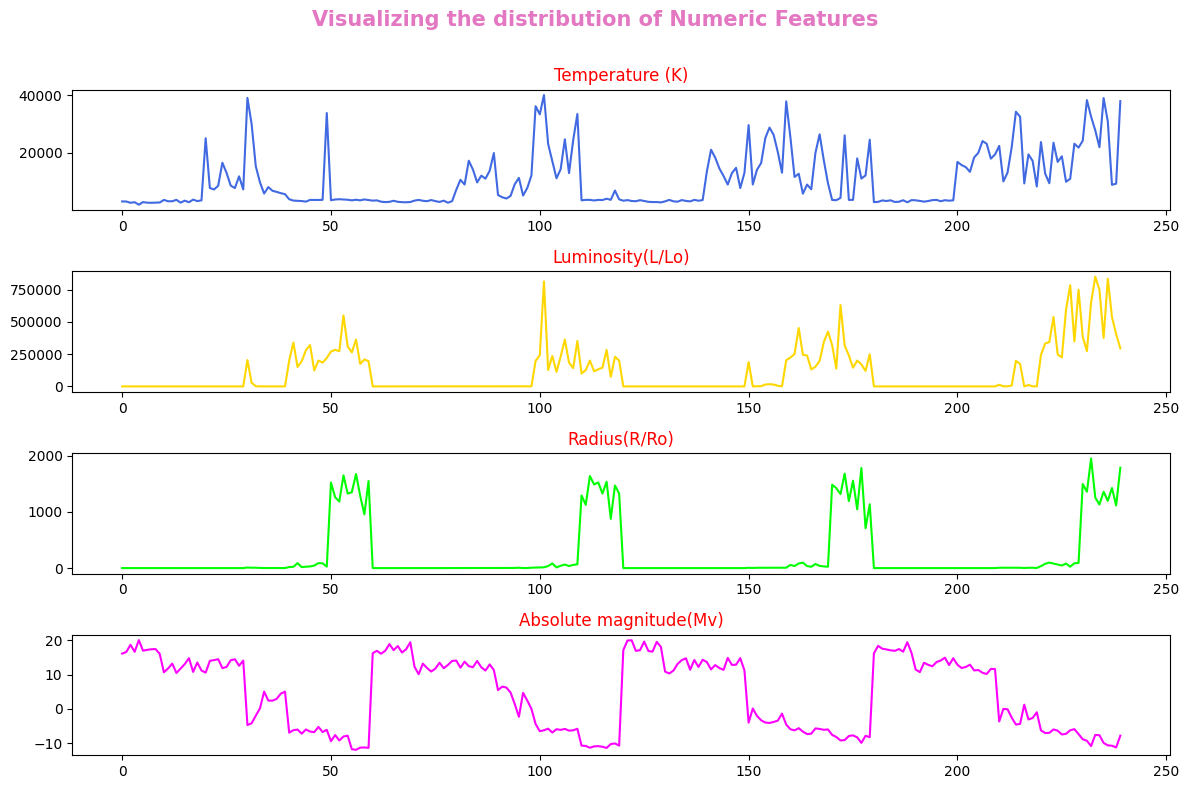

In [173]:
# Line Plots

# Colors to add in line plots
colors = ['royalblue', 'gold', 'lime', 'magenta']

# Add figure size and title to subplot
plt.figure(figsize=(12,8))
plt.suptitle('Visualizing the distribution of Numeric Features\n',
             color='tab:pink', fontsize=15, weight='bold')

# Use for loop and the function that creates subplot of line plots
for i in range(4):
  line_subplot(star_df, colors, i)

# Use tight_layout() to automatically adjust the spacing in subplot
plt.tight_layout()

# Save the figure
plt.savefig(base_dir+'line_subplot.png')
plt.show()